In [1]:
#Qn no 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
### Load dataset
file_path = "housing.csv"  # Change this path if necessary
df = pd.read_csv("C:\\Users\\amrut\\Downloads\\housing.csv")
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
### Handle missing values by filling with median
df.fillna(df.median(numeric_only=True), inplace=True)


In [5]:

### Convert categorical column 'ocean_proximity' using one-hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [6]:
### Separate features and target variable
X = df.drop(columns=['median_house_value'])  # Features
y = df['median_house_value']  # Target variable



In [7]:
### Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 12) (4128, 12) (16512,) (4128,)


In [8]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,False,False,False,True
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,False,False,False,True
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,False,False,False,True
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,False,False,False,True
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,False,False,False,False
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,True,False,False,False
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,False,False,False,False
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,False,False,False,False


In [9]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,True,False,False,False
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,True,False,False,False
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,False,False,True,False
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,False,False,False,False
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,False,False,False,False
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,False,False,False,True
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,False,False,False,False
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,True,False,False,False


In [10]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

In [11]:
y_train

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [29]:
### Standardize features (important for SVR and Gradient Boosting)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
####Qn no 2.Initialize regression models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR()
}


In [35]:
###Qn no 3. Train models and evaluate performance
results = {}
for name, model in models.items():
    # Use scaled data for SVR, otherwise use original
    if name == "Support Vector Regressor":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
# Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
   # Store results
    results[name] = {"MSE": mse, "R² Score": r2} 

In [36]:
# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T
print(results_df)


                                   MSE  R² Score
Linear Regression         4.908477e+09  0.625424
Decision Tree             4.865869e+09  0.628676
Random Forest             2.404746e+09  0.816489
Gradient Boosting         3.123095e+09  0.761670
Support Vector Regressor  1.365597e+10 -0.042115


In [ ]:
### Result analysis
1.Random Forest performed best with the lowest MSE and highest R² score (0.816).

2.Gradient Boosting also performed well, but slightly worse than Random Forest.

3.Linear Regression and Decision Tree had moderate performance.

4.Support Vector Regressor (SVR) performed poorly, likely due to improper hyperparameters.

C:\Users\amrut\AppData\Local\Temp\ipykernel_17904\2834807355.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MSE"], palette="Blues_r")


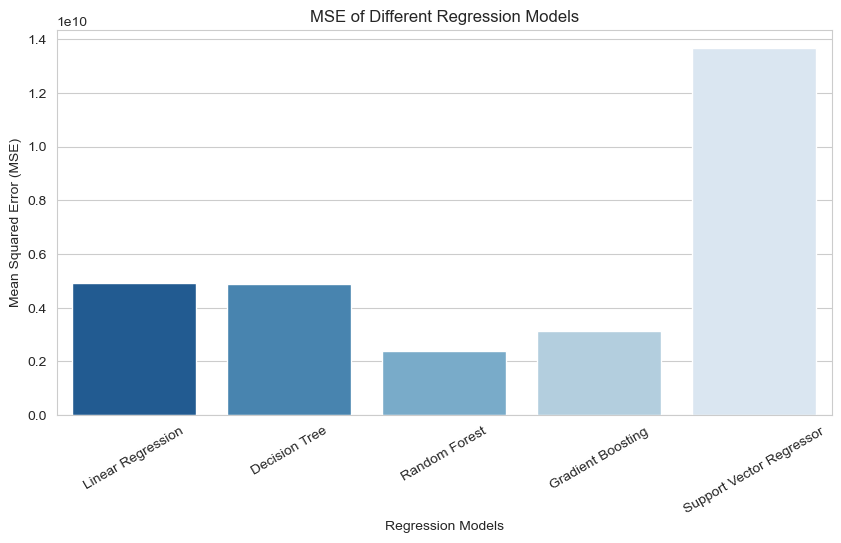

C:\Users\amrut\AppData\Local\Temp\ipykernel_17904\2834807355.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="Greens_r")


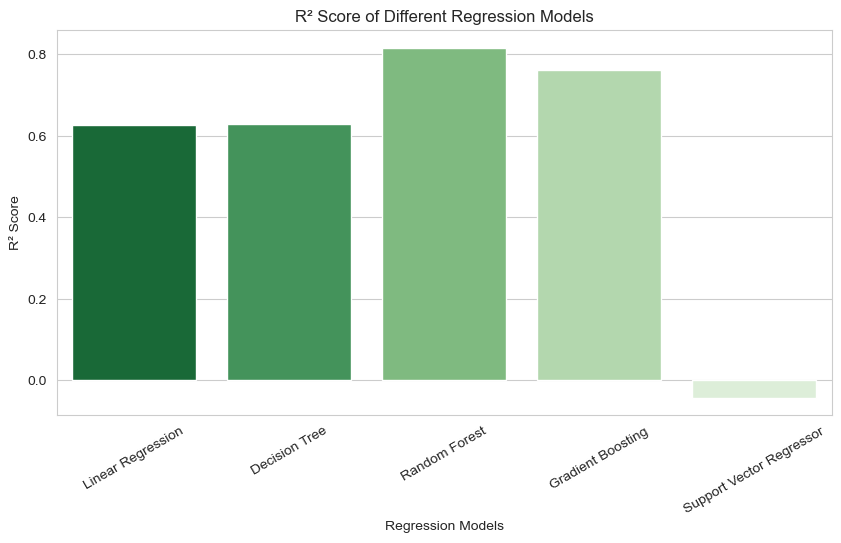

In [37]:
# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results).T

# Set plot style
sns.set_style("whitegrid")

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["MSE"], palette="Blues_r")
plt.xlabel("Regression Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE of Different Regression Models")
plt.xticks(rotation=30)
plt.show()

# Plot R² Score
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="Greens_r")
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("R² Score of Different Regression Models")
plt.xticks(rotation=30)
plt.show()
